In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error,  mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df_train=pd.read_csv('../data/train.csv') 
df_test=pd.read_csv('../data/test.csv')

df_train.shape, df_test.shape

((1460, 81), (1459, 80))

# IMPORT DATASET

## Pulizia dataset

In [3]:
df_train=df_train.drop(columns=['Id'])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test=df_test.drop(columns=['Id'])
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# DATA VISUALIZATION

## Rappresentazione di variabili numeriche con boxplot

In [7]:
numerical=df_train.select_dtypes(include=['int64','float64'])
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


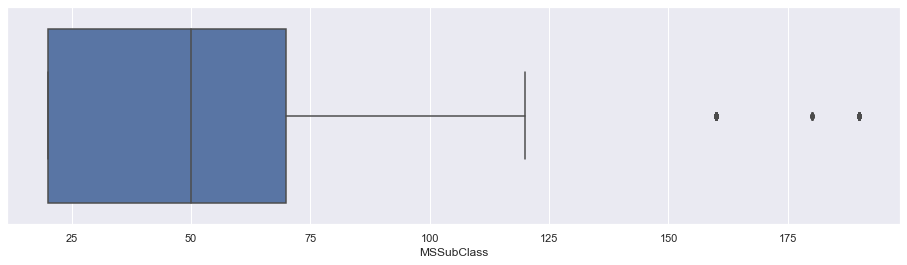

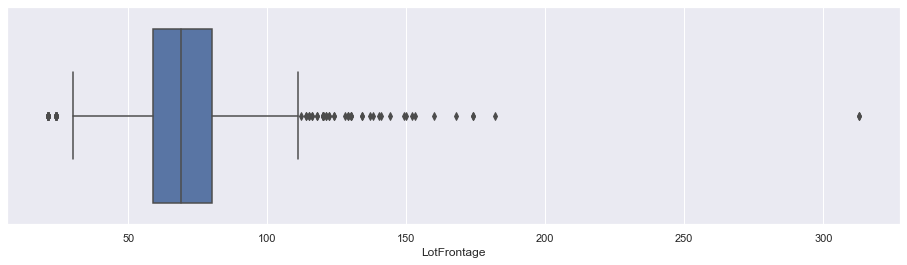

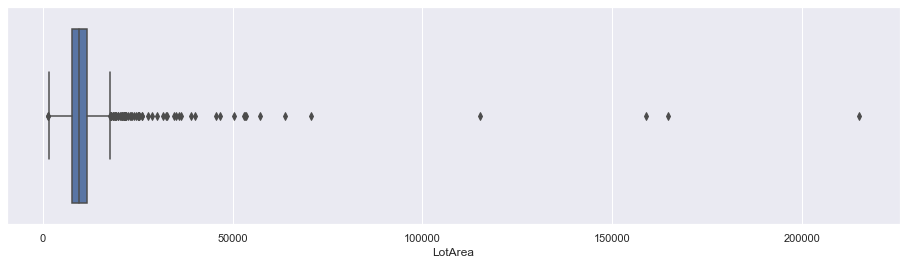

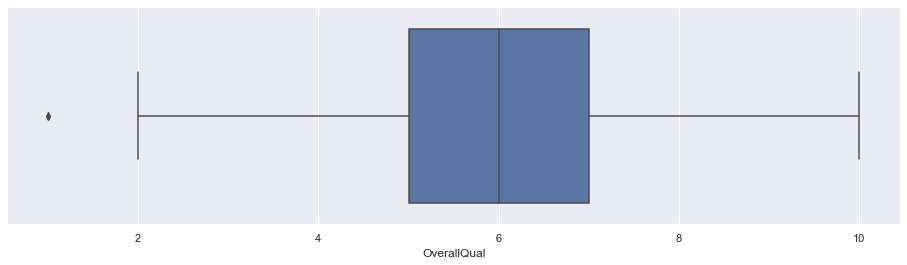

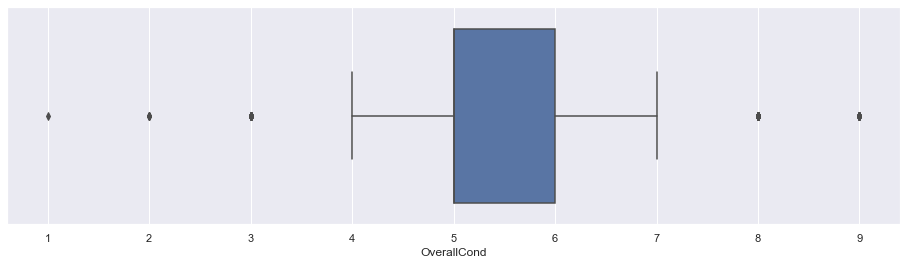

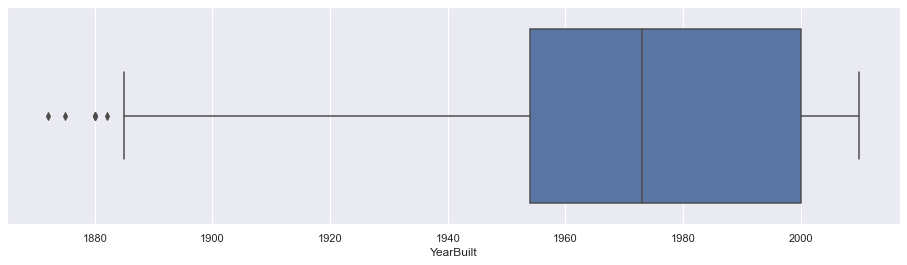

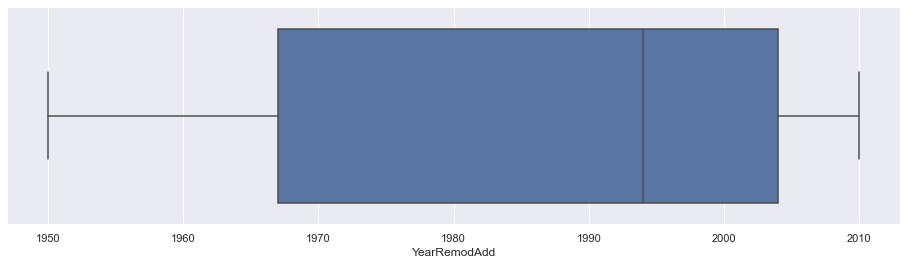

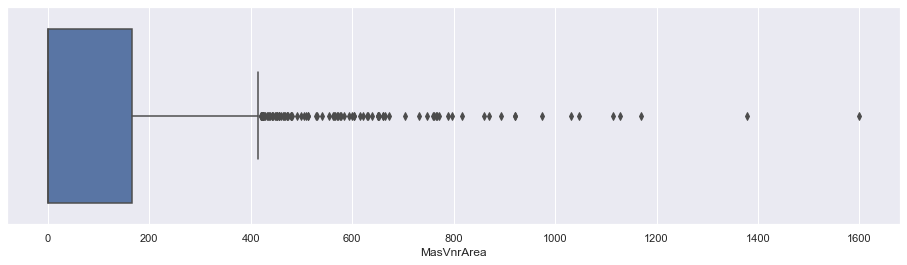

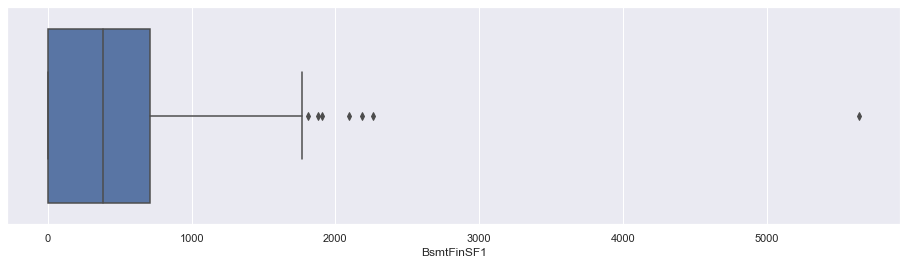

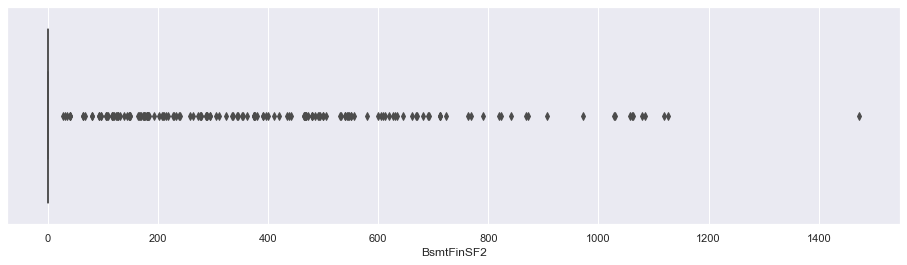

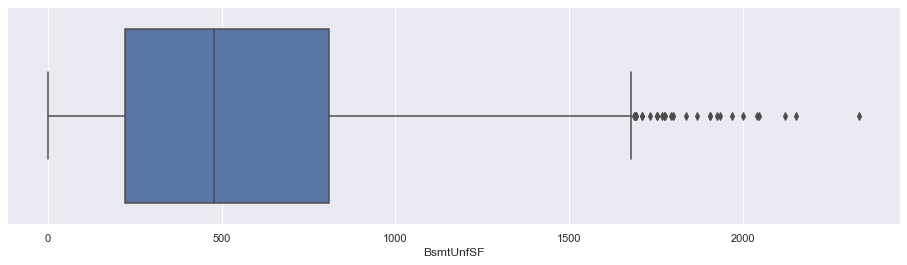

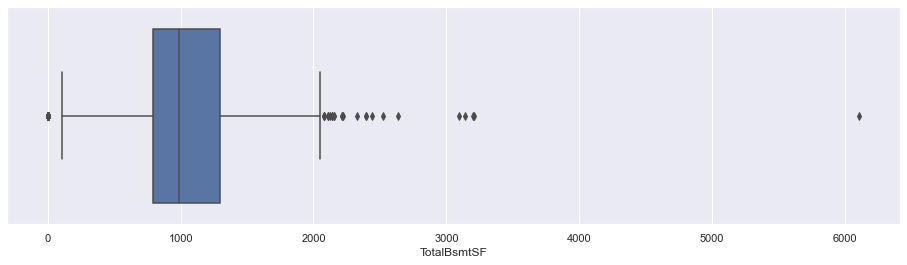

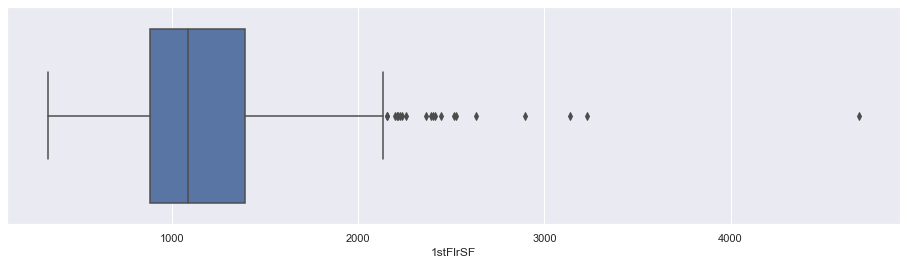

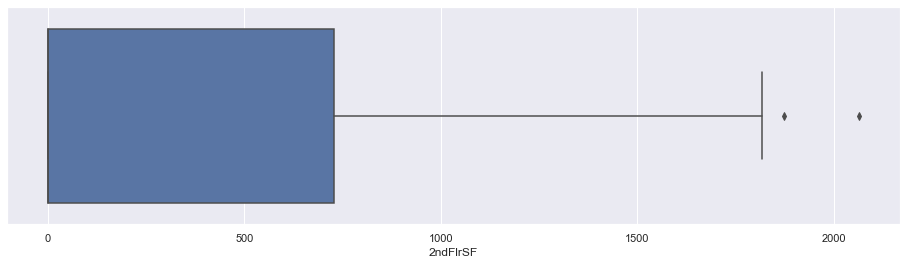

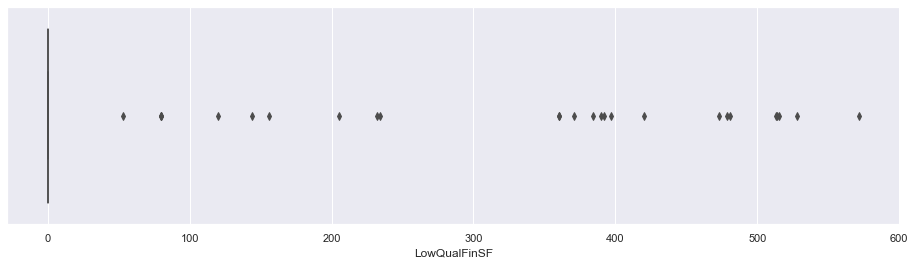

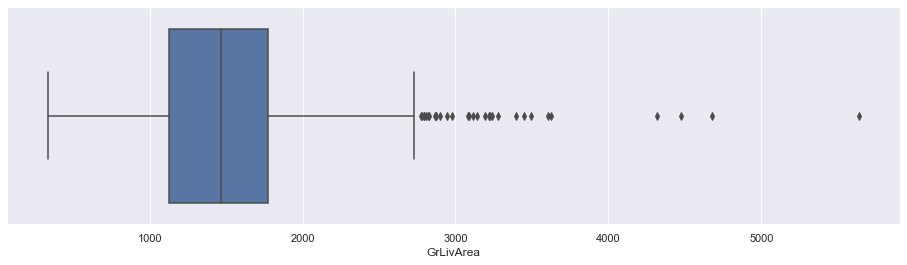

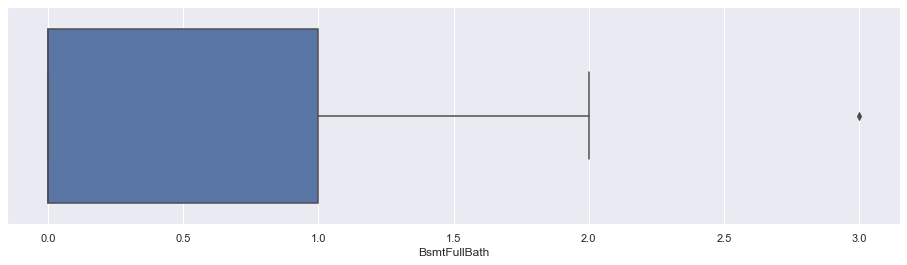

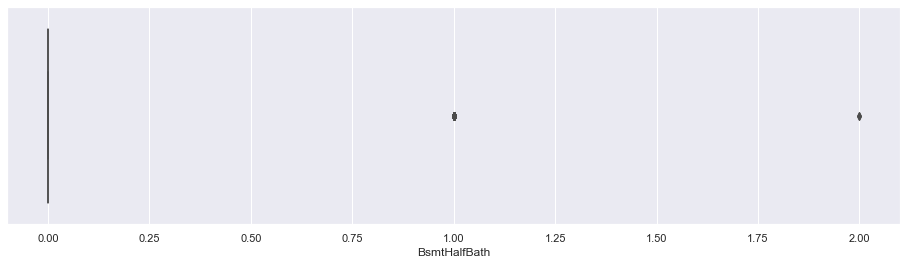

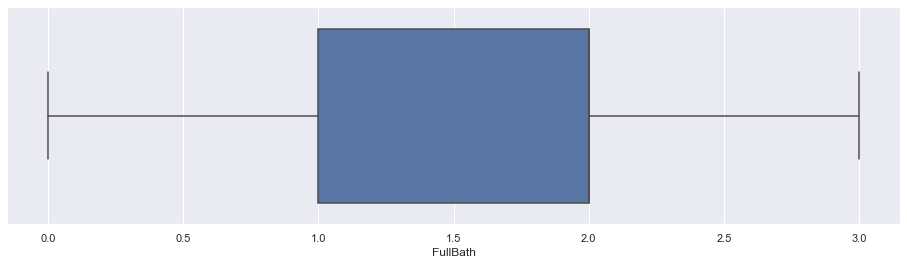

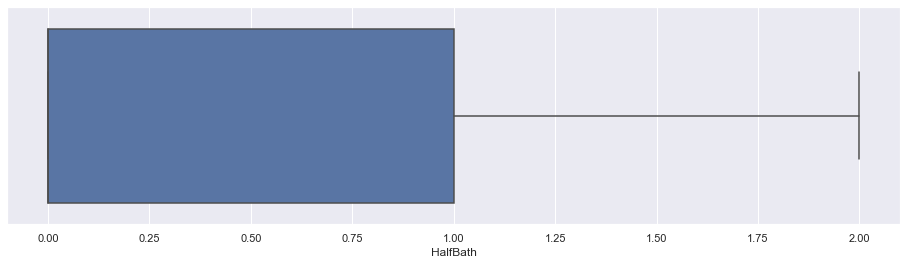

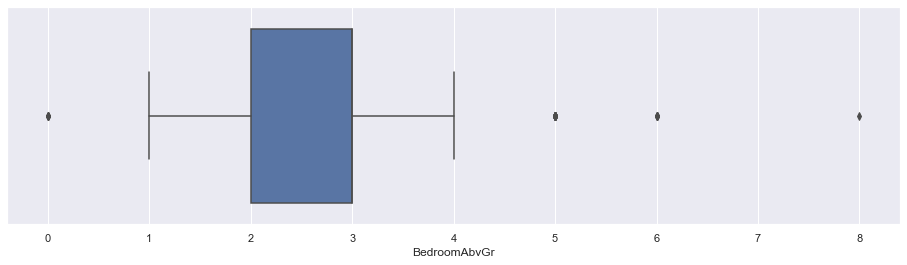

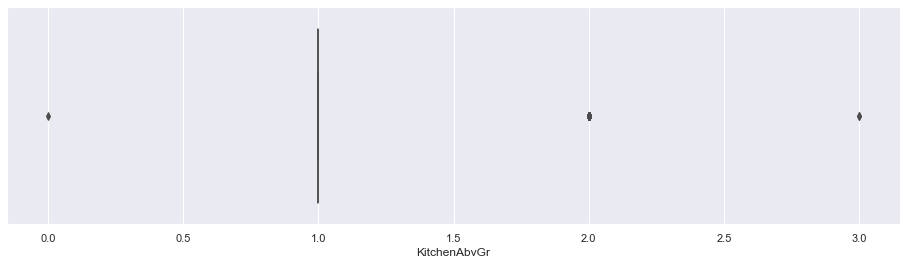

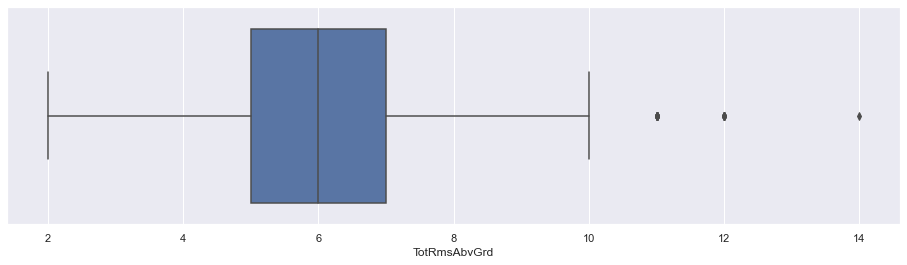

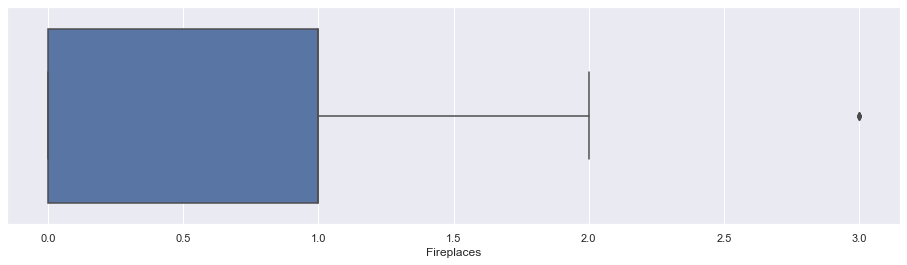

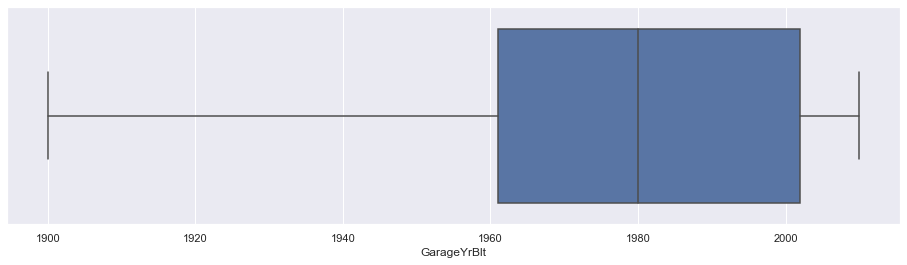

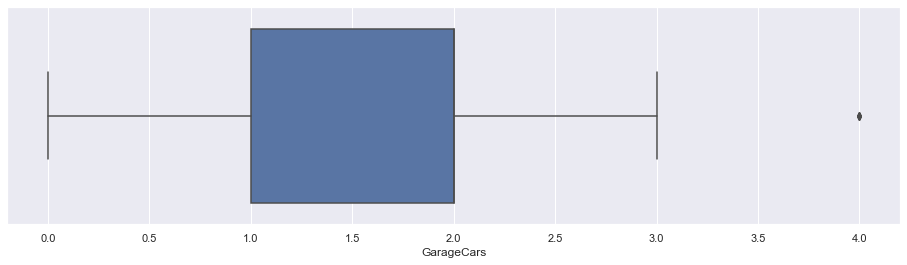

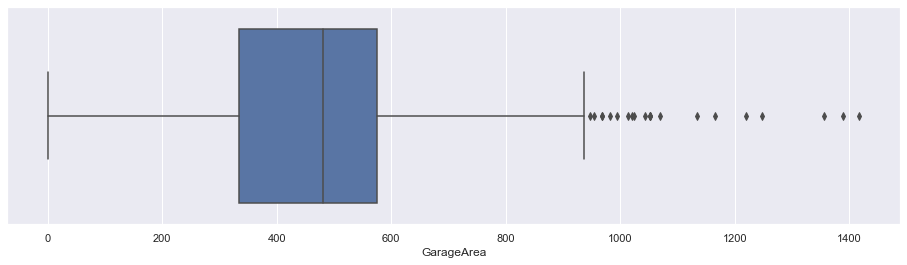

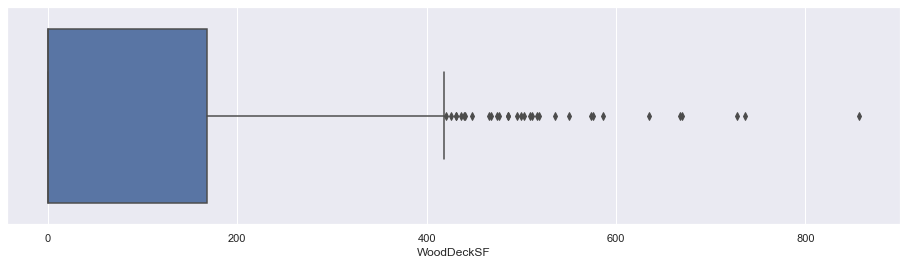

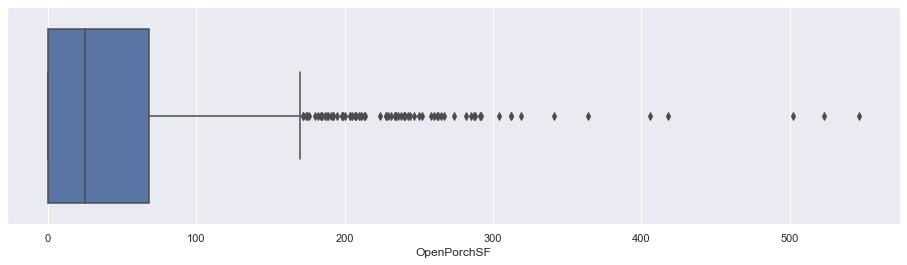

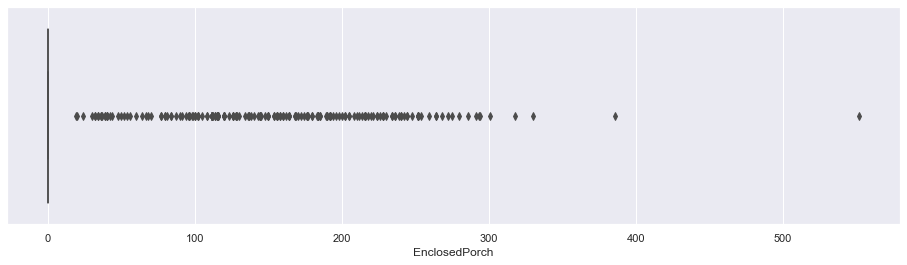

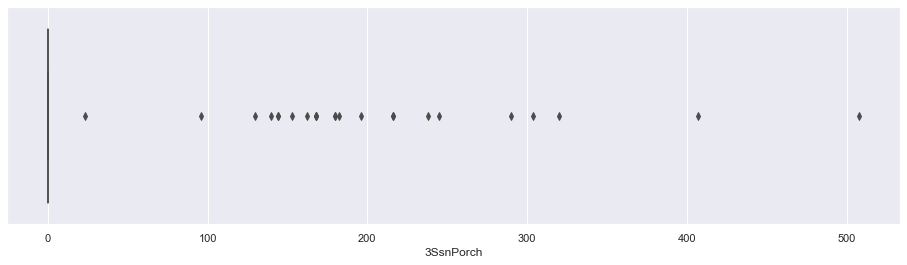

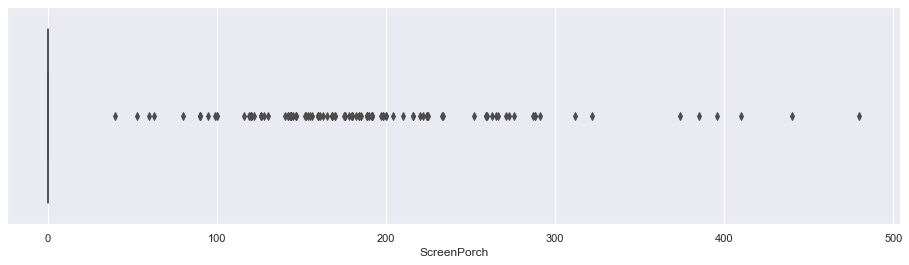

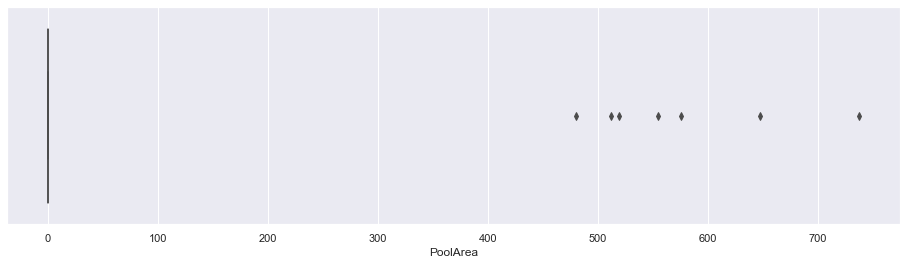

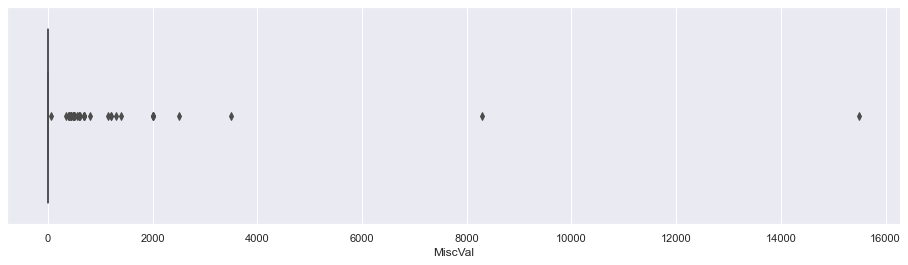

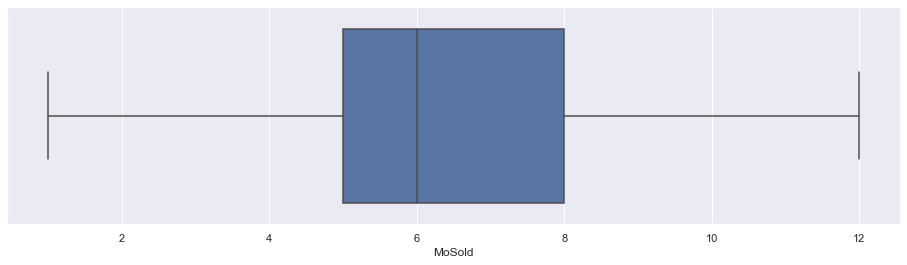

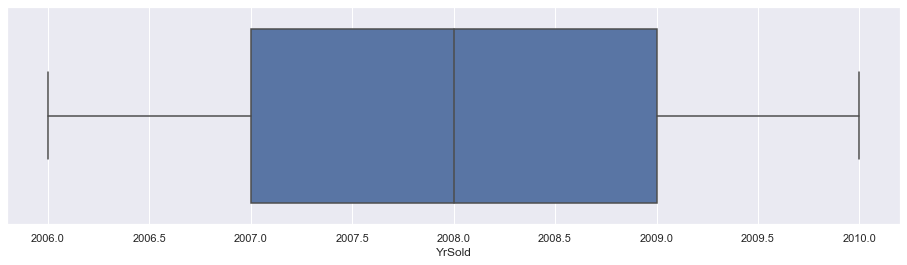

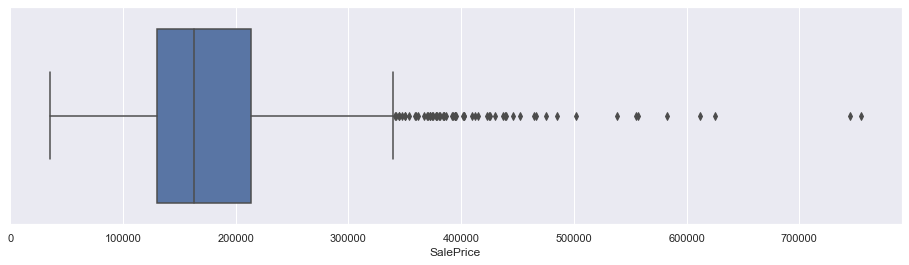

In [8]:
for column in numerical:
    plt.figure(figsize=(16, 4))
    sns.boxplot(numerical[column])

In [9]:
#df_train["MSSubClass"].drop([160,180,190], inplace=True)
#df_train["MSSubClass"].drop(df.apply(lambda x:x>150))

In [10]:
df_train["MSSubClass"].value_counts

<bound method IndexOpsMixin.value_counts of 0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64>

# ESPLORAZIONE VARIABILE TARGET

In [11]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

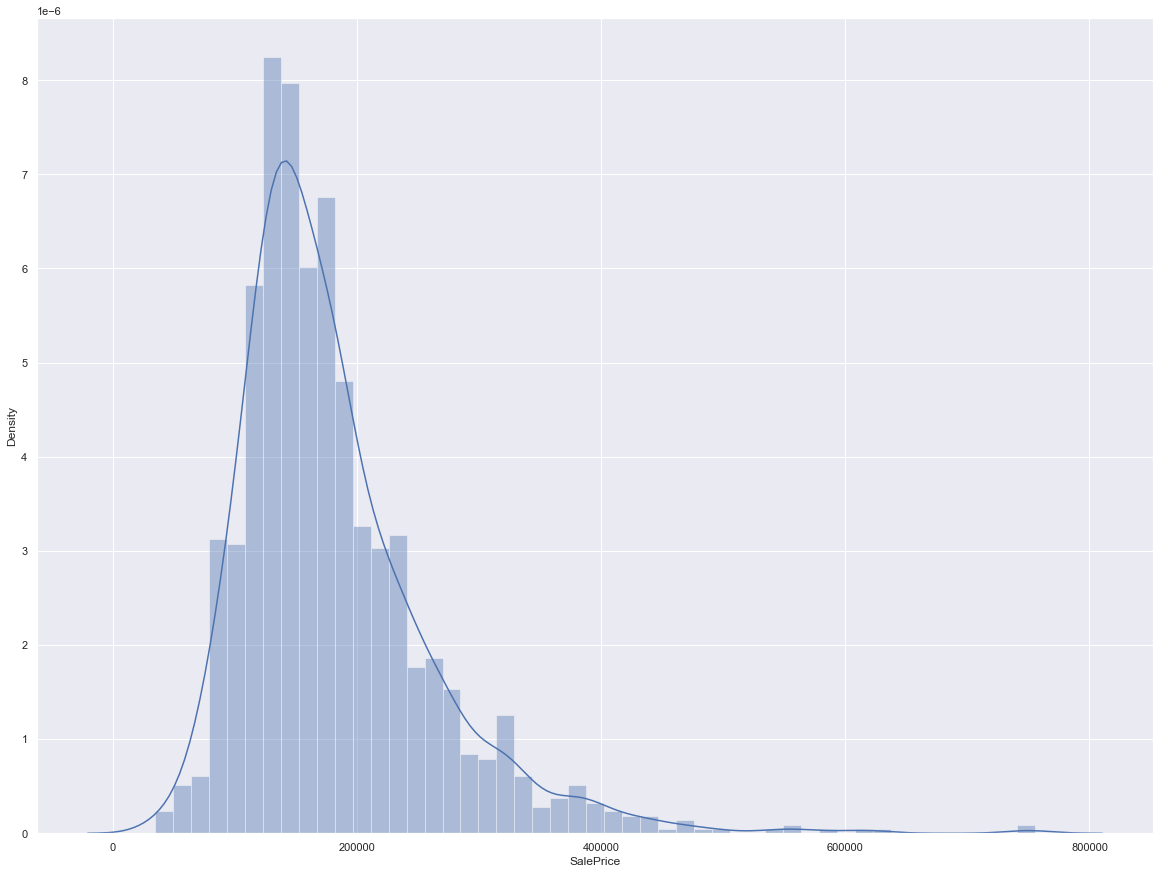

In [12]:
plt.figure(figsize=(20,15))
sns.distplot(df_train['SalePrice']);

# RELAZIONE TRA TARGET E ALCUNE FEATTURES INTERESSANTI

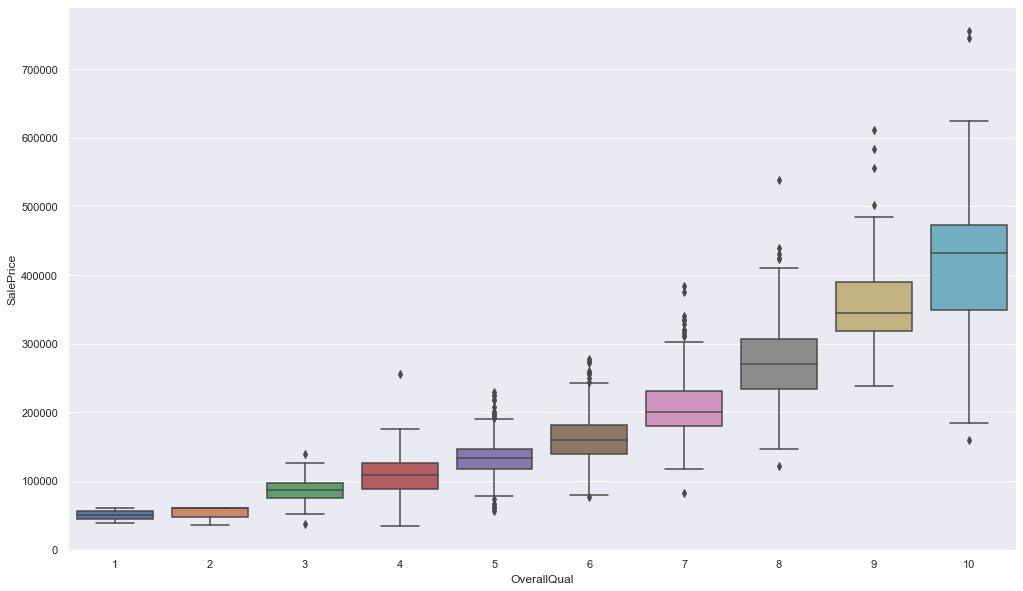

In [13]:
data=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
plt.figure(figsize=(17,10))
sns.boxplot(x='OverallQual',y='SalePrice',data=data);

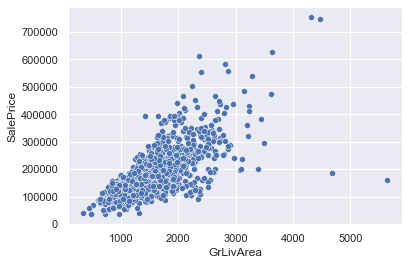

In [14]:
data=pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis=1)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=data);

<AxesSubplot:xlabel='GrLivArea'>

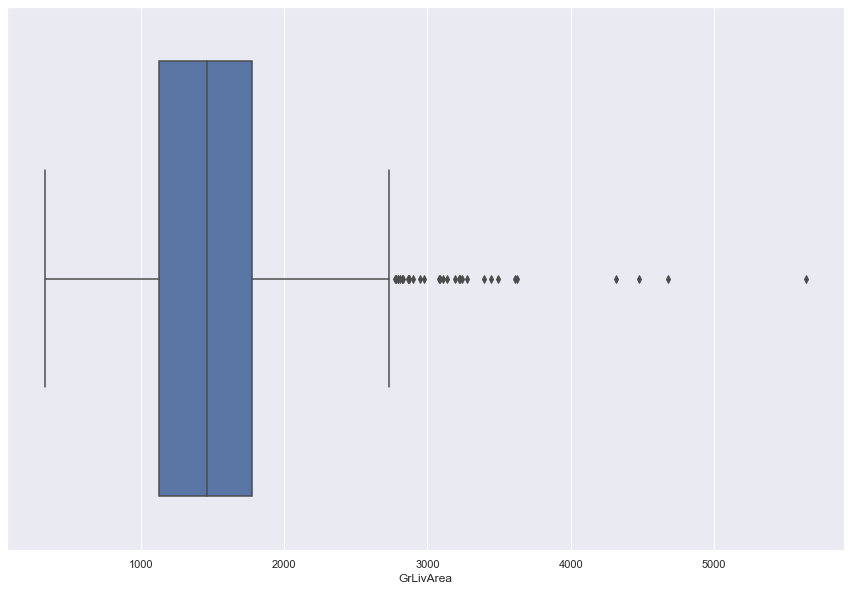

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(x='GrLivArea',data=data)

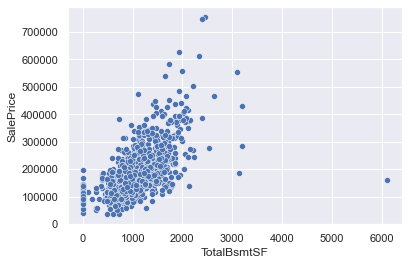

In [16]:
data=pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=data);

<AxesSubplot:xlabel='TotalBsmtSF'>

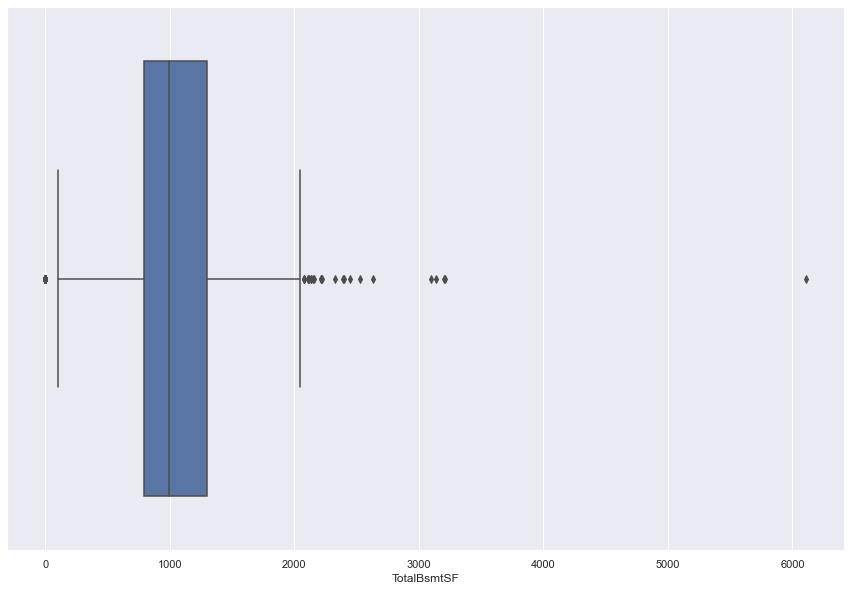

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='TotalBsmtSF',data=data)

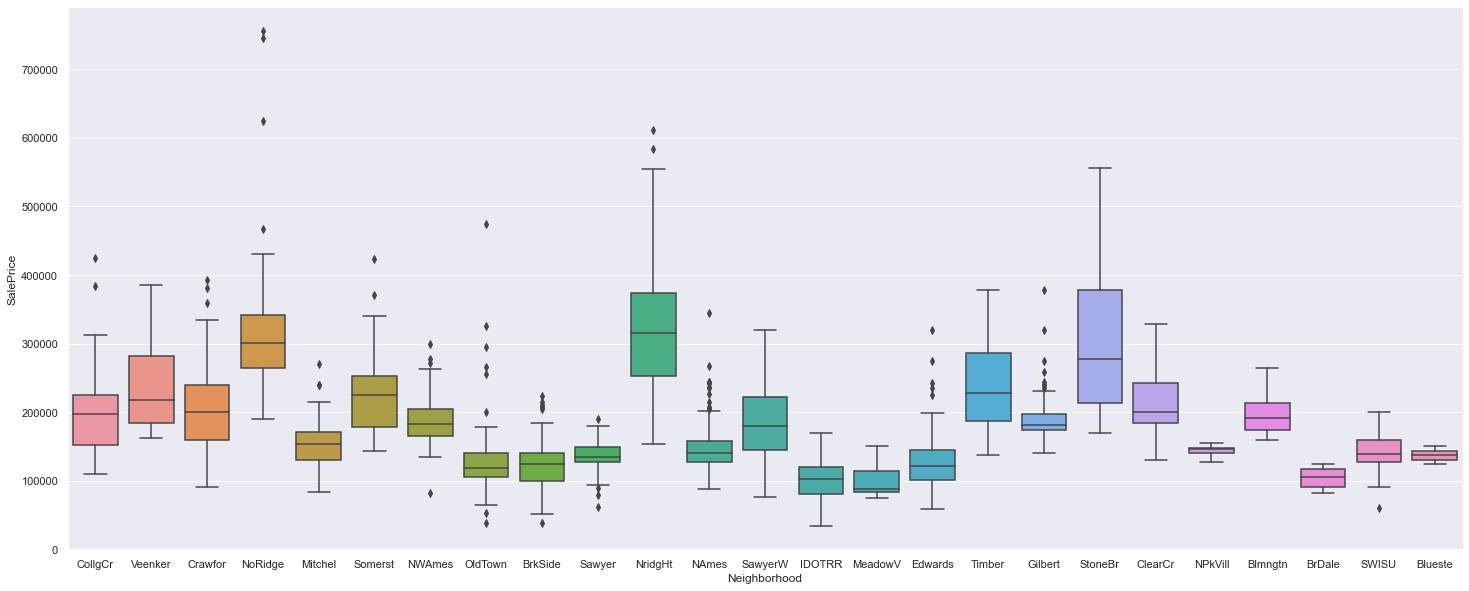

In [18]:
data=pd.concat([df_train['SalePrice'],df_train['Neighborhood']],axis=1)
plt.figure(figsize=(25,10))
sns.boxplot(x='Neighborhood',y='SalePrice',data=data);

# MATRICE DI CORRELAZIONE

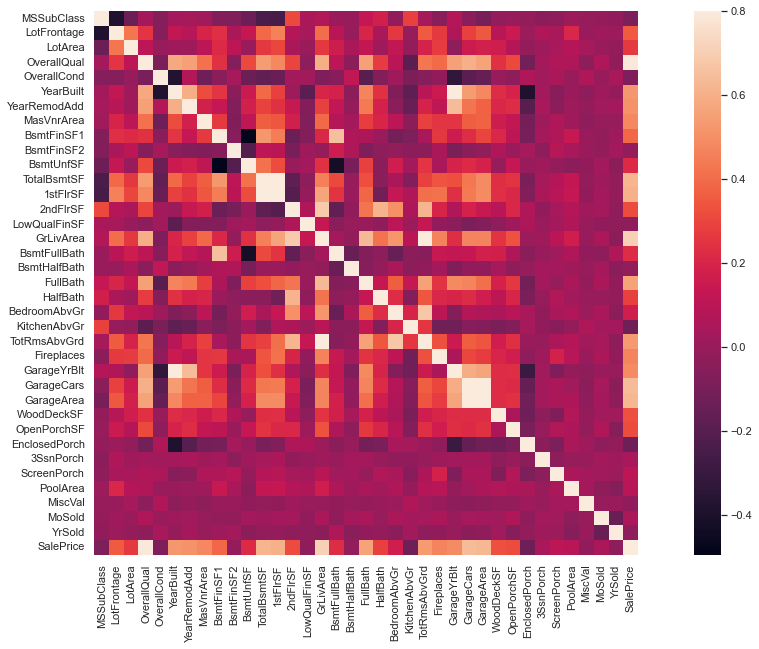

In [19]:
corrmat=df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,vmax=.8, square=True);

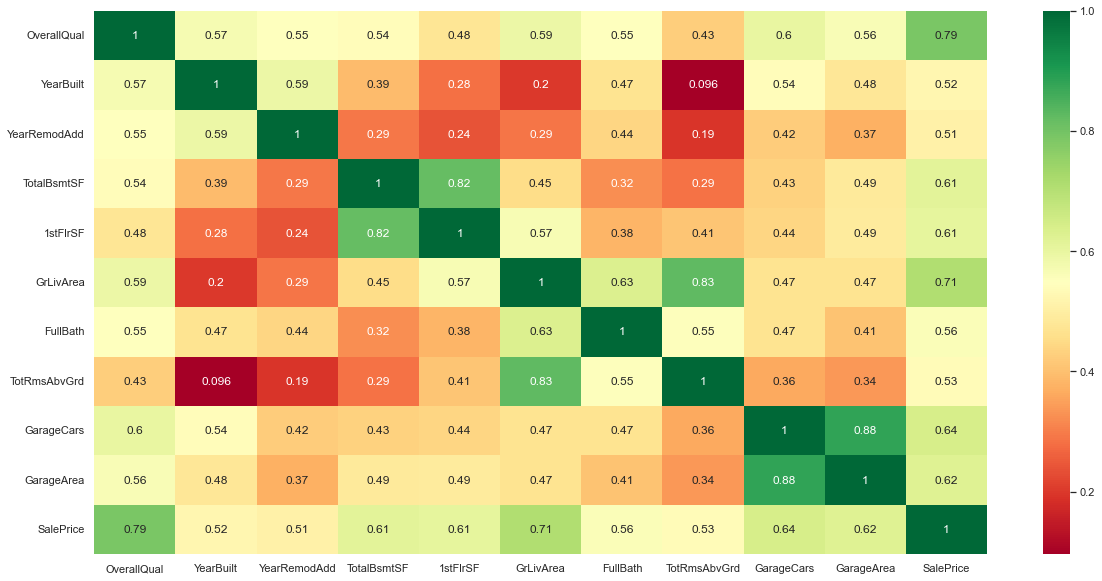

In [20]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>.5]
plt.figure(figsize=(20,10))
sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn");

### 10 features in maggior correlazione col target

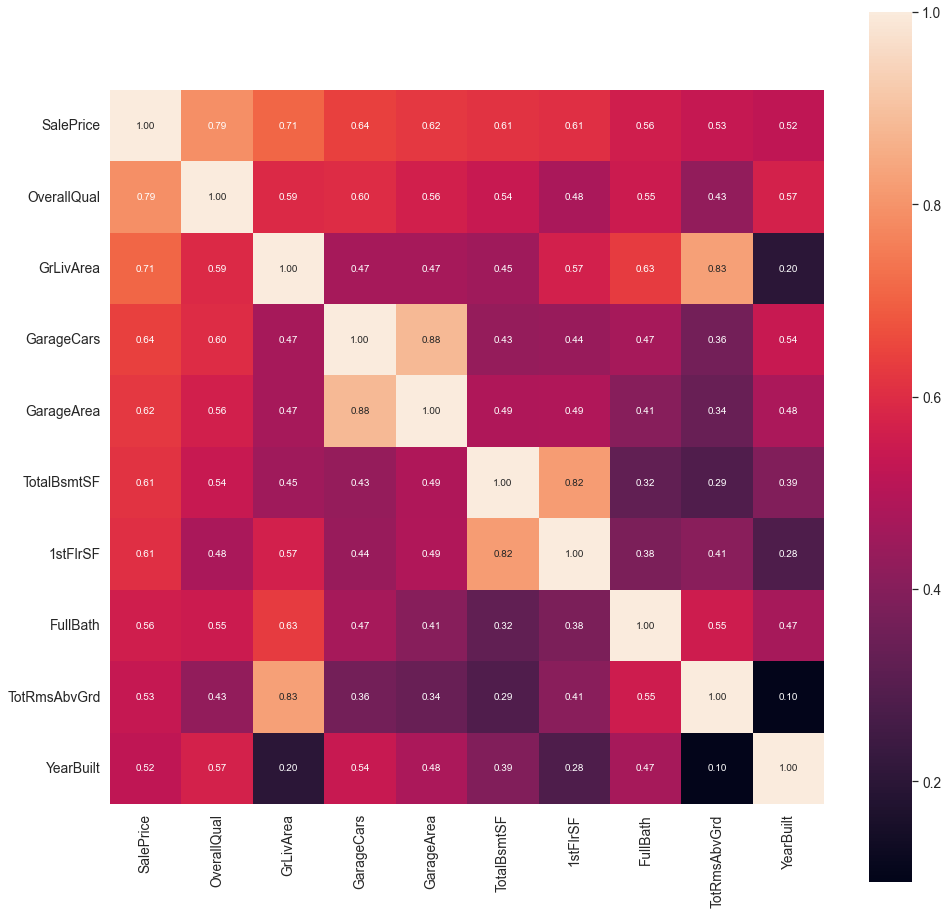

In [21]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(df_train[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [22]:
corr_price = df_train.corr()["SalePrice"].sort_values(ascending = False)
corr_price

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

# 4 variabili + target

In [23]:
def multiplot(data, features, plottype, nrows, ncols, figsize, y=None, colorize=False):
    n=0
    plt.figure(1)
    fig, axes=plt.subplots(nrows, ncols, figsize=figsize)
    
    if colorize:
        colors=sns.color_palette(n_colors=(nrows*ncols))
    else:
        colors=[None]*(nrows*ncols)
    
    for row in range(ncols):
        for col in range(nrows):
            
            if plottype=='regplot':
                if y==None:
                    raise ValueError('y value is needed with regplot type')
                
                sns.regplot(data=data, x=features[n],y=y,ax=axes[row,col],color=colors[n])
                correlation=np.corrcoef(data[features[n]],data[y])[0,1]
                axes[row,col].set_title('Correlation {:.2f}'.format(correlation))
                
            elif plottype=='distplot':
                sns.distplot(a=data[features[n]],ax=axes[row,col],color=colors[n])
            
    
            n+=1
        
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

<Figure size 432x288 with 0 Axes>

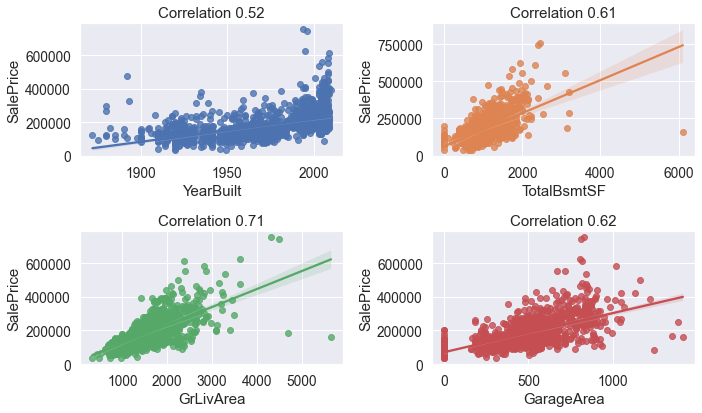

<Figure size 432x288 with 0 Axes>

In [24]:
feats = ["YearBuilt","TotalBsmtSF","GrLivArea","GarageArea"]

multiplot(data = df_train,features = feats,plottype = "regplot",nrows = 2, ncols = 2,
          figsize = (10,6),y = "SalePrice", colorize = True);

### Distribuzione di densità delle 4 variabili considerate

<Figure size 432x288 with 0 Axes>

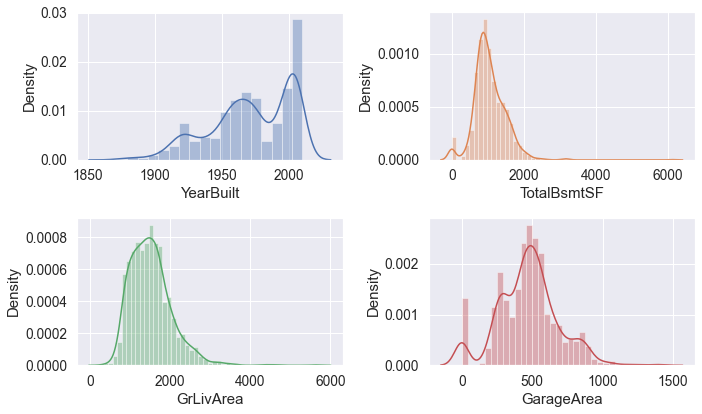

<Figure size 432x288 with 0 Axes>

In [25]:
feats = ["YearBuilt","TotalBsmtSF","GrLivArea","GarageArea"]

multiplot(data = df_train,features = feats,plottype = "distplot",nrows = 2, ncols = 2,
          figsize = (10,6),y = "SalePrice", colorize = True);

# TRATTAMENTO NAN

In [26]:
for i in df_train:
    if df_train[i].isna().sum()!=0:
        print(i,' ',df_train[i].isna().sum())

LotFrontage   259
Alley   1369
MasVnrType   8
MasVnrArea   8
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical   1
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageQual   81
GarageCond   81
PoolQC   1453
Fence   1179
MiscFeature   1406


In [27]:
total = df_train.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(30)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


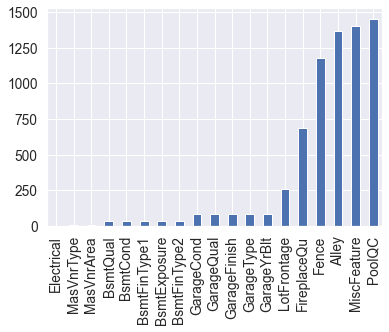

In [28]:
missing=df_train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [29]:
df_train['Alley']=df_train['Alley'].fillna('No')
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("No")
df_train["Fence"] = df_train["Fence"].fillna("No")
df_train["PoolQC"] = df_train["PoolQC"].fillna("No")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("No")

df_train["BsmtCond"] = df_train["BsmtCond"].fillna("No")
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("No")
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("No")
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("No")
df_train.loc[df_train["BsmtCond"] == "No","BsmtUnfSF"] = 0
df_train.loc[df_train["BsmtFinType1"] == "No","BsmtFinSF1"] = 0
df_train.loc[df_train["BsmtFinType2"] == "No","BsmtFinSF2"] = 0
df_train.loc[df_train["BsmtQual"] == "No","TotalBsmtSF"] = 0
df_train.loc[df_train["BsmtCond"] == "No","BsmtHalfBath"] = 0
df_train.loc[df_train["BsmtCond"] == "No","BsmtFullBath"] = 0
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("No")

df_train["GarageType"] = df_train["GarageType"].fillna("No")
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("No")
df_train["GarageQual"] = df_train["GarageQual"].fillna("No")
df_train["GarageCond"] = df_train["GarageCond"].fillna("No")
df_train.loc[df_train["GarageType"] == "No","GarageYrBlt"] = df_train["YearBuilt"][df_train["GarageType"]=="No"]
df_train.loc[df_train["GarageType"] == "No","GarageCars"] = 0
df_train.loc[df_train["GarageType"] == "No","GarageArea"] = 0

df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train.loc[df_train["MasVnrType"] == "None","MasVnrArea"] = 0

In [30]:
for i in df_train:
    if df_train[i].isna().sum()!=0:
        print(i,' ',df_train[i].isna().sum())

LotFrontage   259
Electrical   1


<AxesSubplot:>

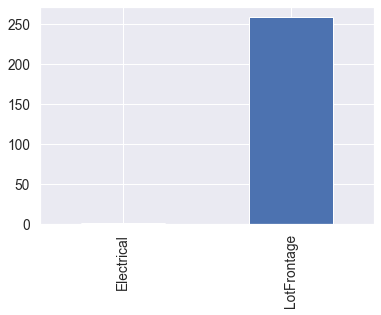

In [31]:
missing=df_train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [32]:
for i in df_test:
    if df_test[i].isna().sum()!=0:
        print(i,' ',df_test[i].isna().sum())

MSZoning   4
LotFrontage   227
Alley   1352
Utilities   2
Exterior1st   1
Exterior2nd   1
MasVnrType   16
MasVnrArea   15
BsmtQual   44
BsmtCond   45
BsmtExposure   44
BsmtFinType1   42
BsmtFinSF1   1
BsmtFinType2   42
BsmtFinSF2   1
BsmtUnfSF   1
TotalBsmtSF   1
BsmtFullBath   2
BsmtHalfBath   2
KitchenQual   1
Functional   2
FireplaceQu   730
GarageType   76
GarageYrBlt   78
GarageFinish   78
GarageCars   1
GarageArea   1
GarageQual   78
GarageCond   78
PoolQC   1456
Fence   1169
MiscFeature   1408
SaleType   1


In [33]:
total = df_test.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(35)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageFinish,78
GarageQual,78
GarageCond,78


<AxesSubplot:>

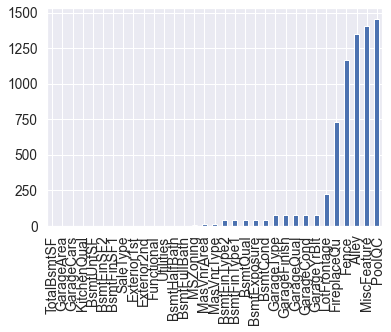

In [34]:
missing=df_test.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [35]:
df_test['Alley']=df_test['Alley'].fillna('No')
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("No")
df_test["Fence"] = df_test["Fence"].fillna("No")
df_test["PoolQC"] = df_test["PoolQC"].fillna("No")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("No")

df_test["BsmtCond"] = df_test["BsmtCond"].fillna("No")
df_test["BsmtQual"] = df_test["BsmtQual"].fillna("No")
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna("No")
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna("No")
df_test.loc[df_test["BsmtCond"] == "No","BsmtUnfSF"] = 0
df_test.loc[df_test["BsmtFinType1"] == "No","BsmtFinSF1"] = 0
df_test.loc[df_test["BsmtFinType2"] == "No","BsmtFinSF2"] = 0
df_test.loc[df_test["BsmtQual"] == "No","TotalBsmtSF"] = 0
df_test.loc[df_test["BsmtCond"] == "No","BsmtHalfBath"] = 0
df_test.loc[df_test["BsmtCond"] == "No","BsmtFullBath"] = 0
df_test["BsmtExposure"] = df_test["BsmtExposure"].fillna("No")

df_test["GarageType"] = df_test["GarageType"].fillna("No")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("No")
df_test["GarageQual"] = df_test["GarageQual"].fillna("No")
df_test["GarageCond"] = df_test["GarageCond"].fillna("No")
df_test.loc[df_test["GarageType"] == "No","GarageYrBlt"] = df_test["YearBuilt"][df_test["GarageType"]=="No"]
df_test.loc[df_test["GarageType"] == "No","GarageCars"] = 0
df_test.loc[df_test["GarageType"] == "No","GarageArea"] = 0

df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test.loc[df_test["MasVnrType"] == "None","MasVnrArea"] = 0

In [36]:
for i in df_test:
    if df_test[i].isna().sum()!=0:
        print(i,' ',df_test[i].isna().sum())

MSZoning   4
LotFrontage   227
Utilities   2
Exterior1st   1
Exterior2nd   1
KitchenQual   1
Functional   2
GarageYrBlt   2
GarageCars   1
GarageArea   1
SaleType   1


<AxesSubplot:>

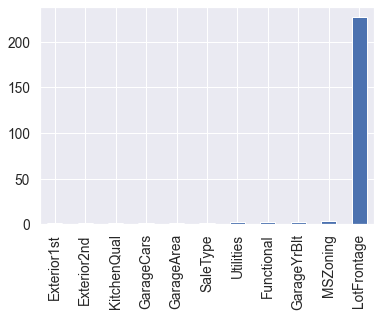

In [37]:
missing=df_test.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

# Unione train e set

In [38]:
df=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,20,RH,80.0,11622,Pave,No,Reg,Lvl,AllPub,Inside,...,No,MnPrv,No,0,6,2010,WD,Normal,test,NaN
1,20,RL,81.0,14267,Pave,No,IR1,Lvl,AllPub,Corner,...,No,No,Gar2,12500,6,2010,WD,Normal,test,NaN
2,60,RL,74.0,13830,Pave,No,IR1,Lvl,AllPub,Inside,...,No,MnPrv,No,0,3,2010,WD,Normal,test,NaN
3,60,RL,78.0,9978,Pave,No,IR1,Lvl,AllPub,Inside,...,No,No,No,0,6,2010,WD,Normal,test,NaN
4,120,RL,43.0,5005,Pave,No,IR1,HLS,AllPub,Inside,...,No,No,No,0,1,2010,WD,Normal,test,NaN


In [39]:
total = df.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(35)

,Total
SalePrice,1459
LotFrontage,486
MSZoning,4
GarageYrBlt,2
Functional,2
Utilities,2
GarageArea,1
Exterior1st,1
GarageCars,1
KitchenQual,1


<AxesSubplot:>

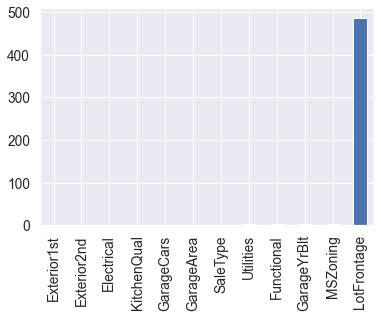

In [40]:
temp_df=df.copy()
price=temp_df.pop('SalePrice')

missing=temp_df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

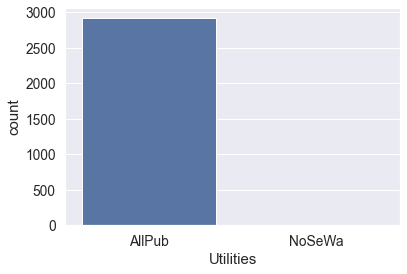

In [41]:
sns.countplot(df["Utilities"]);

In [42]:
df["Utilities"] = df["Utilities"].fillna("AllPub")

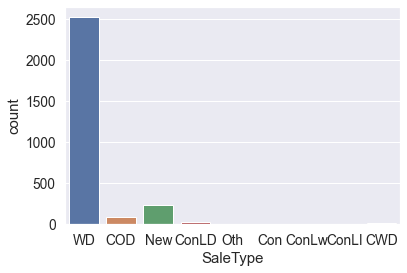

In [43]:
sns.countplot(df["SaleType"]);

In [44]:
df["SaleType"] = df["SaleType"].fillna("WD")

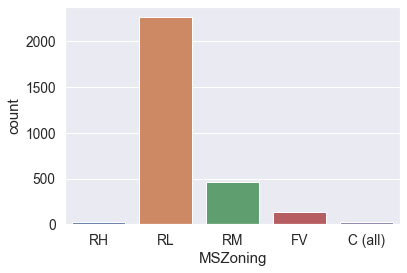

In [45]:
sns.countplot(df["MSZoning"]);

In [46]:
df["MSZoning"] = df["MSZoning"].fillna("RL")

<AxesSubplot:xlabel='Functional', ylabel='count'>

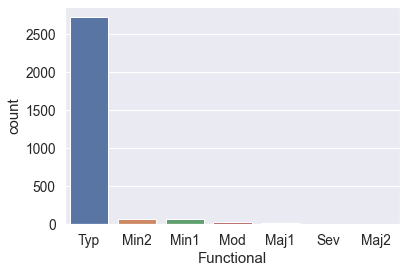

In [47]:
sns.countplot(df["Functional"])

In [48]:
df["Functional"] = df["Functional"].fillna("Typ")

<AxesSubplot:xlabel='Electrical', ylabel='count'>

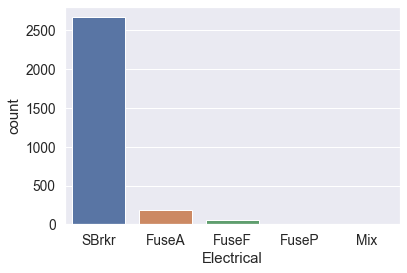

In [49]:
sns.countplot(df["Electrical"])

In [50]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

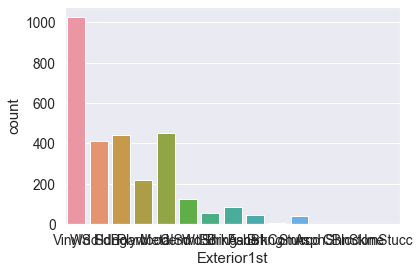

In [51]:
sns.countplot(df["Exterior1st"])

In [52]:
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode())

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

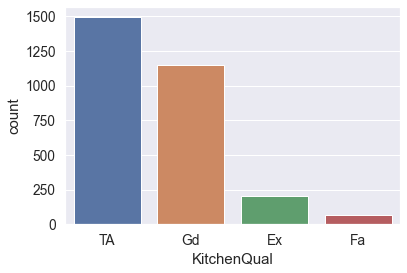

In [53]:
sns.countplot(df["KitchenQual"])

In [54]:
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode())

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

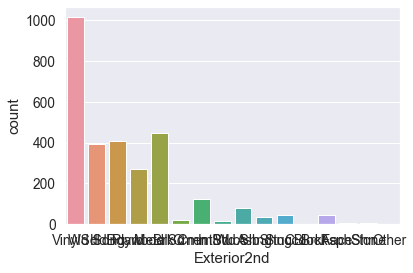

In [55]:
sns.countplot(x=df["Exterior2nd"])

In [56]:
df["Exterior2nd"] = df["Exterior2nd"].fillna(df["Exterior2nd"].mode())

In [57]:
df["GarageArea"] = df["GarageArea"].fillna(df["GarageArea"].median())
df["GarageCars"] = df["GarageCars"].fillna(df["GarageCars"].median())
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())

In [58]:
x_cat=df.select_dtypes(include='object')
x_num=df.select_dtypes(exclude='object')

In [59]:
x_cat=pd.get_dummies(x_cat)

In [60]:
df=df.loc[:,~df.columns.duplicated()]

In [61]:
df_Train=df.iloc[:1460,:]
df_Test=df.iloc[1460:,:]

In [62]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [63]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# CODIFICA VARIABILI TEMPORALI

In [64]:
X_test, train= df[df["ind"].eq("test")], df[df["ind"].eq("train")]
X_test.drop(["SalePrice", "ind"], axis=1, inplace=True)
train.drop(["ind"], axis=1, inplace=True)
X_test.shape,train.shape

((1459, 79), (1460, 80))

In [65]:
X_train = train.loc[:, train.columns!='SalePrice']
y_train = train['SalePrice']
X_train.shape,y_train.shape

((1460, 79), (1460,))

In [66]:
X_train_cat = X_train[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
X_train_cat.shape

(1460, 45)

In [67]:
X_test_cat = X_test[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
X_test_cat.shape

(1459, 45)

In [68]:
X_train_num=X_train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                     '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                     'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]

X_test_num=X_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                     '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                     'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]
X_train_num.shape, X_test_num.shape

((1460, 28), (1459, 28))

In [129]:
X_test_num=df_Test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                     '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                     'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']]
X_test_num.shape 

(1459, 28)

In [130]:
X_train_cat.isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [131]:
X_test_num.isna().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

# CODIFICO LE FEATURES CATEGORICHE E STANDARDIZZO LE FEATURES NUMERICHE

In [132]:
encoder=OneHotEncoder(sparse=False)
scaler=StandardScaler()

rob_scaler=RobustScaler()

X_train_cat_enc=encoder.fit_transform(X_train_cat)
X_train_num_scaled=scaler.fit_transform(X_train_num)
X_train_num_scaled_rob=rob_scaler.fit_transform(X_train_num)

X_test_cat_enc=encoder.fit_transform(X_test_cat)
X_test_num_scaled=scaler.fit_transform(X_test_num)
X_test_num_scaled_rob=rob_scaler.fit_transform(X_test_num)

X_train_cat_enc.shape,X_train_num_scaled.shape,X_test_cat_enc.shape,X_test_num_scaled.shape

((1460, 289), (1460, 28), (1459, 275), (1459, 28))

# SPLIT IN TRAIN E TEST SET

In [133]:
X_train_preprocessed=np.concatenate([X_train_cat_enc,X_train_num_scaled],axis=1)
X_train_preprocessed_rob=np.concatenate([X_train_cat_enc,X_train_num_scaled_rob],axis=1)

In [134]:
X_test_preprocessed=np.concatenate([X_test_cat_enc,X_test_num_scaled],axis=1)
X_test_preprocessed_rob=np.concatenate([X_test_cat_enc,X_test_num_scaled_rob],axis=1)

In [135]:
X_train_preprocessed.shape,X_train_preprocessed_rob.shape,X_test_preprocessed.shape,X_test_preprocessed_rob.shape

((1460, 317), (1460, 317), (1459, 303), (1459, 303))

# IMPLEMENTAZIONE MODELLI

In [136]:
X_train_pr,X_test_pr,y_train_pr,y_test_pr=train_test_split(X_train_preprocessed,y_train,test_size=.25,random_state=0)
X_train_pr.shape,y_train_pr.shape,X_test_pr.shape,y_test_pr.shape
#in realtà superfluo, si può non fare e guardare solo score di cv

((1095, 317), (1095,), (365, 317), (365,))

In [137]:
X_train_pr,X_test_pr,y_train_pr,y_test_pr=train_test_split(X_train_preprocessed,y_train,test_size=.25,random_state=0)

X_train_pr_rob,X_test_pr_rob,y_train_pr_rob,y_test_pr_rob=train_test_split(X_train_preprocessed_rob,y_train,test_size=.25,random_state=0)

X_train_pr.shape,y_train_pr.shape,X_test_pr.shape,y_test_pr.shape

((1095, 317), (1095,), (365, 317), (365,))

### Decision Tree Regressor

In [138]:
score_fnc=mean_squared_error
max_depth_grid=np.linspace(2,20,30).astype(int)
min_samples_leaf_grid=np.linspace(5,25,20).astype(int)
param_grid={'max_depth':max_depth_grid,'min_samples_leaf':min_samples_leaf_grid}
cv=KFold(n_splits=10,shuffle=True,random_state=0)
dt=DecisionTreeRegressor(random_state=0)

model_selection=GridSearchCV(dt,param_grid=param_grid,scoring=make_scorer(score_fnc),cv=cv)


model_selection.fit(X_train_pr,y_train_pr)
model_selection

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 2,  2,  3,  3,  4,  5,  5,  6,  6,  7,  8,  8,  9, 10, 10, 11, 11,
       12, 13, 13, 14, 15, 15, 16, 16, 17, 18, 18, 19, 20]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 25])},
             scoring=make_scorer(mean_squared_error))

In [139]:
model_selection.best_estimator_

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=0)

In [140]:
selected_dt=DecisionTreeRegressor(max_depth=2, min_samples_leaf=5,random_state=0)
selected_dt.fit(X_train_pr,y_train_pr)
dt_preds=selected_dt.predict(X_test_pr)

### Random Forest Regressor

In [80]:
score_fnc=mean_squared_error
n_estimators_grid=[50,100,150,200]
max_depth_grid=np.linspace(5,20,30).astype(int)
min_samples_leaf_grid=np.linspace(5,25,20).astype(int)
param_grid={'n_estimators':n_estimators_grid,'max_depth':max_depth_grid,'min_samples_leaf':min_samples_leaf_grid}
cv=KFold(n_splits=10,shuffle=True,random_state=0)
rf=RandomForestRegressor(n_jobs=-1)

model_selection=GridSearchCV(rf,param_grid=param_grid,scoring=make_scorer(score_fnc),cv=cv)


model_selection.fit(X_train_pr,y_train_pr)
model_selection

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': array([ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13,
       13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 20]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 25]),
                         'n_estimators': [50, 100, 150, 200]},
             scoring=make_scorer(mean_squared_error))

In [81]:
model_selection.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=25, n_jobs=-1)

In [93]:
'''selected_rf=RandomForestRegressor(max_depth=5, min_samples_leaf=25, n_jobs=-1)
selected_rf.fit(X_train_pr,y_train_pr)
y_preds=selected_rf.predict(X_test_pr)'''

selected_rf=RandomForestRegressor(max_depth=5, min_samples_leaf=25, n_jobs=-1)
selected_rf.fit(X_train_pr,y_train_pr)
rf_preds=selected_rf.predict(X_test_pr)
mean_absolute_error(y_test_pr,rf_preds),mean_squared_error(y_test_pr,rf_preds),np.sqrt(mean_squared_error(y_test_pr,rf_preds))

(21872.05029297156, 1483750159.1616993, 38519.47765951272)

### SVR

In [83]:
score_fnc=mean_squared_error
param_grid = [
                {'kernel':['linear'],
                 'C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]},

                {'kernel':['poly'],
                 'C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
                 'degree':[2,3,5]},

                {'kernel':['rbf'],
                 'C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
                 'gamma' : [1e-1, 1, 10]}
            
            ]
cv=KFold(n_splits=10,shuffle=True,random_state=0)
svm=SVR()

model_selection=GridSearchCV(svm,param_grid=param_grid,scoring=make_scorer(score_fnc),cv=cv)


model_selection.fit(X_train_pr,y_train_pr)
model_selection

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVR(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'degree': [2, 3, 5], 'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'gamma': [0.1, 1, 10], 'kernel': ['rbf']}],
             scoring=make_scorer(mean_squared_error))

In [84]:
model_selection.best_estimator_

SVR(C=100.0, gamma=10)

In [85]:
selected_svm=SVR(kernel='rbf',gamma=10.0,C=100)
selected_svm.fit(X_train_pr,y_train_pr)
svm_preds=selected_svm.predict(X_test_pr)

### Linear Regression

In [86]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train_pr,y_train_pr)
lr_preds=lr.predict(X_test_pr)

### K Neighbors Regressor

In [87]:
score_fnc=mean_squared_error
n_neighbors_grid=np.arange(5,31)
param_grid={'n_neighbors':n_neighbors_grid}
cv=KFold(n_splits=10,shuffle=True,random_state=0)
knn=KNeighborsRegressor()

model_selection=GridSearchCV(knn,param_grid=param_grid,scoring=make_scorer(score_fnc),cv=cv)


model_selection.fit(X_train_pr,y_train_pr)
model_selection

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring=make_scorer(mean_squared_error))

In [88]:
model_selection.best_estimator_

KNeighborsRegressor(n_neighbors=29)

In [89]:
selected_knn=KNeighborsRegressor(n_neighbors=29)
selected_knn.fit(X_train_pr,y_train_pr)
knn_preds=selected_knn.predict(X_test_pr)

# RISULTATI

In [94]:
print('DECISION TREE REGRESSOR')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, dt_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, dt_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, dt_preds)))
print('\n***')
print('\nRANDOM FOREST REGRESSOR')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, y_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, y_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, y_preds)))
print('\n***')
print('\nSUPPORT VECTOR MACHINE REGRESSOR')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, svm_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, svm_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, svm_preds)))
print('\n***')
print('\nLINEAR REGRESSION')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, lr_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, lr_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, lr_preds)))
print('\n***')
print('\nKNEIGHBORS REGRESSOR')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, knn_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, knn_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, knn_preds)))
print('\n***')

DECISION TREE REGRESSOR

Mean Absolute Error(MAE): 38683.1599485515
Mean Squared Error(MSE): 3159120874.9987035
Root Mean Squared Error (RMSE): 56206.057280320805

***

RANDOM FOREST REGRESSOR

Mean Absolute Error(MAE): 21788.131298951233
Mean Squared Error(MSE): 1439904952.3182206
Root Mean Squared Error (RMSE): 37946.07953818445

***

SUPPORT VECTOR MACHINE REGRESSOR

Mean Absolute Error(MAE): 55234.58686141171
Mean Squared Error(MSE): 6962353821.732173
Root Mean Squared Error (RMSE): 83440.72040516054

***

LINEAR REGRESSION

Mean Absolute Error(MAE): 38591832286794.43
Mean Squared Error(MSE): 9.844031098673372e+28
Root Mean Squared Error (RMSE): 313751989613984.3

***

KNEIGHBORS REGRESSOR

Mean Absolute Error(MAE): 22929.839300897496
Mean Squared Error(MSE): 1757465450.8640566
Root Mean Squared Error (RMSE): 41922.13557136679

***


In [141]:
print('\nKNEIGHBORS REGRESSOR')
print('\nMean Absolute Error(MAE):', mean_absolute_error(y_test_pr, knn_preds))
print('Mean Squared Error(MSE):', mean_squared_error(y_test_pr, knn_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test_pr, knn_preds)))


KNEIGHBORS REGRESSOR

Mean Absolute Error(MAE): 22929.839300897496
Mean Squared Error(MSE): 1757465450.8640566
Root Mean Squared Error (RMSE): 41922.13557136679


In [142]:
ris_prima_mae=[]
ris_prima_mae.append(mean_absolute_error(y_test_pr, dt_preds))
ris_prima_mae.append(mean_absolute_error(y_test_pr, rf_preds))
ris_prima_mae.append(mean_absolute_error(y_test_pr, svm_preds))
ris_prima_mae.append(mean_absolute_error(y_test_pr, lr_preds))
ris_prima_mae.append(mean_absolute_error(y_test_pr, knn_preds))

In [143]:
ris_prima_mse=[]
ris_prima_mse.append(mean_squared_error(y_test_pr, dt_preds))
ris_prima_mse.append(mean_squared_error(y_test_pr, rf_preds))
ris_prima_mse.append(mean_squared_error(y_test_pr, svm_preds))
ris_prima_mse.append(mean_squared_error(y_test_pr, lr_preds))
ris_prima_mse.append(mean_squared_error(y_test_pr, knn_preds))

In [144]:
ris_prima_rmse=[]
ris_prima_rmse.append(np.sqrt(mean_squared_error(y_test_pr, dt_preds)))
ris_prima_rmse.append(np.sqrt(mean_squared_error(y_test_pr, rf_preds)))
ris_prima_rmse.append(np.sqrt(mean_squared_error(y_test_pr, svm_preds)))
ris_prima_rmse.append(np.sqrt(mean_squared_error(y_test_pr, lr_preds)))
ris_prima_rmse.append(np.sqrt(mean_squared_error(y_test_pr, knn_preds)))

In [145]:
ris_prima=pd.DataFrame(columns=['ris_prima_mae','ris_prima_mse','ris_prima_rmse'])
ris_prima.append(ris_prima_mae)
ris_prima.append(ris_prima_mse)
ris_prima.append(ris_prima_rmse)
ris_prima

,ris_prima_mae,ris_prima_mse,ris_prima_rmse


# SUBMISSION

In [146]:
sub=pd.read_csv('../data/sample_submission.csv')
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [147]:
predictions=selected_rf.predict(df_Test)
submission=pd.DataFrame(predictions)
datasets=pd.concat([sub['Id'],submission],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

ValueError: could not convert string to float: 'RL'

In [125]:
sample_submission=pd.read_csv('../data/sample_submission.csv')
sample_submission.head(20)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831
